In [1]:
!pip install spacy

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 409.0 kB/s eta 0:00:31
     -- ------------------------------------ 0.8/12.8 MB 568.6 kB/s eta 0:00:22
     --- ----------------------------------- 1.0/12.8 MB 709.1 kB/s eta 0:00:17
     ---- ---------------------------------- 1.6/12.8 MB 921.7 kB/s eta 0:00:13
     ----- --------------------------------- 1.8/12.8 MB 996.7 kB/s eta 0:00:12
     ------ --------------------------------- 2.1/12.8 MB 1.1 MB/s eta 0:00:11
     -------- ------------------------------- 2.6/12.8 MB 1.2 MB/s eta 0:00:09
     --------- ------------------------------ 3.1/12.8 MB 1.3 MB/s eta 0:00:08
   

In [4]:
import numpy as np # linear algebra
import pandas as pd
import os

In [5]:
for dirname, _, filenames in os.walk(r"C:\Users\shanshiya\Downloads\archive\Genre Classification Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\shanshiya\Downloads\archive\Genre Classification Dataset\description.txt
C:\Users\shanshiya\Downloads\archive\Genre Classification Dataset\test_data.txt
C:\Users\shanshiya\Downloads\archive\Genre Classification Dataset\test_data_solution.txt
C:\Users\shanshiya\Downloads\archive\Genre Classification Dataset\train_data.txt


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import spacy

from scipy import sparse

In [8]:
train=pd.read_csv( "train_data.txt",sep=':::',header=None,names=['id','title','genre','description'])
test=pd.read_csv( "test_data.txt",sep=':::',header=None,names=['id','title','genre','description'])


In [9]:
train

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [10]:
test

,id,title,genre,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


                     FEATURE  CREATION

In [11]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [12]:
train['title'][0].split('(')[-1][:4]

'2009'

In [13]:
train['title'][0].split('(')[:-1][0]

' Oscar et la dame rose '

In [14]:
def extract_year(data):
    if data.split('(')[-1][:4].isdigit():
        return int(data.split('(')[-1][:4])
    return None

train['year']=train['title'].apply(extract_year)
test['year']=test['title'].apply(extract_year)

In [15]:
def transform_title(data):
    if data.split('(')[-1][:4].isdigit():
        return data.split('(')[:-1][0]
    return None

train['title']=train['title'].apply(transform_title)
test['title']=test['title'].apply(transform_title)

In [16]:
train


,title,genre,description,year
0,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009.0
1,Cupid,thriller,A brother and sister with a past incestuous r...,1997.0
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980.0
3,The Secret Sin,drama,To help their unemployed father make ends mee...,1915.0
4,The Unrecovered,drama,The film's title refers not only to the un-re...,2007.0
...,...,...,...,...
54209,"""Bonino""",comedy,This short-lived NBC live sitcom centered on ...,1953.0
54210,None,horror,The NEXT Generation of EXPLOITATION. The sist...,NaN
54211,Ronald Goedemondt: Ze bestaan echt,documentary,"Ze bestaan echt, is a stand-up comedy about g...",2008.0
54212,Make Your Own Bed,comedy,Walter and Vivian live in the country and hav...,1944.0


In [17]:
missing_val=test.isna().sum()['year']
total_val=test.shape[0]
print(f'"Year" Column on test dataset got {(missing_val/total_val)*100} percent missing values.')


"Year" Column on test dataset got 5.119926199261993 percent missing values.


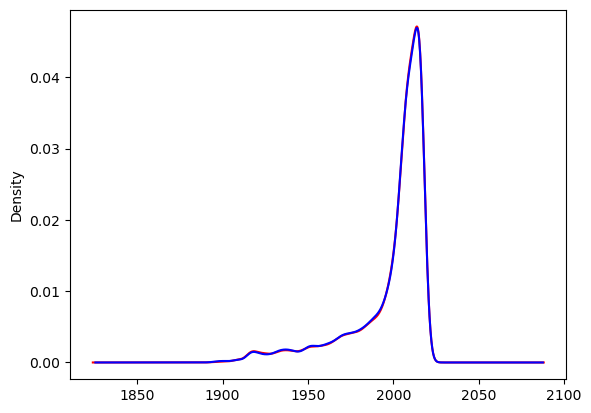

In [18]:
train['year'].plot(kind='kde',color='red')
test['year'].plot(kind='kde',color='blue')
plt.show()

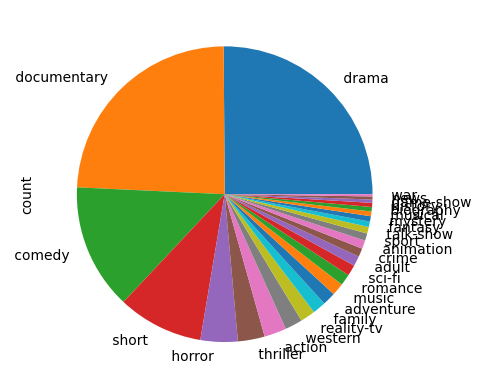

In [19]:
train['genre'].value_counts().plot(kind='pie')
plt.show()

In [20]:
# Import necessary libraries



import numpy as np

import pandas as pd

import regex as re

import nltk

import matplotlib.pyplot as plt



from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from gensim.models import Word2Vec



import warnings

warnings.filterwarnings('ignore')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        51522 non-null  object 
 1   genre        54214 non-null  object 
 2   description  54214 non-null  object 
 3   year         51522 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        51425 non-null  object 
 1   genre        54200 non-null  object 
 2   description  0 non-null      float64
 3   year         51425 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB


In [23]:
# Check for null values

train.isnull().sum()

title          2692
genre             0
description       0
year           2692
dtype: int64

In [24]:
test.isnull().sum()

title           2775
genre              0
description    54200
year            2775
dtype: int64

In [29]:
train.head() 

,title,genre,description,year
0,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009.0
1,Cupid,thriller,A brother and sister with a past incestuous r...,1997.0
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980.0
3,The Secret Sin,drama,To help their unemployed father make ends mee...,1915.0
4,The Unrecovered,drama,The film's title refers not only to the un-re...,2007.0


In [32]:
train['genre'].nunique()

27

In [33]:
train['genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [34]:
train['genre'].value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

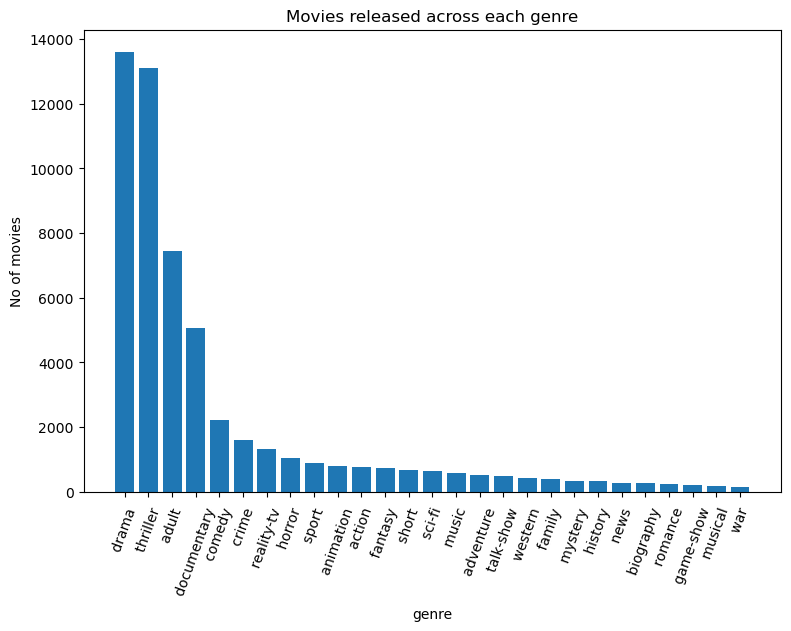

In [38]:
# Plotting the distribution of movies across each genre



plt.figure(figsize=(9,6))

plt.bar(train['genre'].unique(),train['genre'].value_counts())

plt.title('Movies released across each genre')

plt.xlabel('genre')

plt.ylabel('No of movies')

plt.xticks(rotation = 70)

plt.show()

In [42]:
# Splitting the training data 



x_train = train.iloc[:,1].values # Considering only the movie description as a feature to predict the genre of the movie 

y_train = train.iloc[:,-1].values



# Selecting the testing data

x_test = test.iloc[:,-1].values # Considering only the movie description as a feature to predict the genre of the movie 

              TEXT  PREPROCESSING

In [43]:
def process_text(text):

    ''' This function performing text cleaning & converts words into it's base form '''

    

    # Convert to lowercase

    sentence = text.lower()

    

    # Removing username

    sentence = re.sub(r'@[a-zA-Z0-9_.]+','',sentence) 

    

    # Removing URLs

    sentence = re.sub(r"https?://\S+|www\.\S+",'',sentence)

    

    # Character normalization 

    sentence = re.sub(r"([a-zA-Z])\1{2,}", r'\1', sentence)

    

    # Removing punctuations 

    sentence = re.sub(r'[^\w\s]','',sentence)

    

    # Removing stopwords & converting to lowercase

    english_stop = stopwords.words('english')

    sentence = ' '.join([word for word in sentence.split() if word not in english_stop])

    

    # Performing word tokenization

    sentence = word_tokenize(sentence) # Returns a list of words

    

    # Performing lemmatization

    lemmatizer = WordNetLemmatizer()

    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence])

    

    return sentence


In [49]:

import nltk
 


In [52]:
# Representing the processed text as a list of words


for i, desc in enumerate(x_test):
    if not isinstance(desc, str):
        print(f"Non-string value at index {i}: {desc}")
x_test_low = [str(desc).split() for desc in x_test]

import numpy as np
x_test = [desc if isinstance(desc, str) else '' for desc in x_test]  # Replace with empty string
x_test_low = [desc.split() for desc in x_test]


Non-string value at index 0: 1998.0
Non-string value at index 1: 1977.0
Non-string value at index 2: 2010.0
Non-string value at index 3: 2015.0
Non-string value at index 4: 1955.0
Non-string value at index 5: 2016.0
Non-string value at index 6: 1969.0
Non-string value at index 7: 1989.0
Non-string value at index 8: 2005.0
Non-string value at index 9: 2011.0
Non-string value at index 10: 1975.0
Non-string value at index 11: 2013.0
Non-string value at index 12: 1990.0
Non-string value at index 13: 2012.0
Non-string value at index 14: 2000.0
Non-string value at index 15: 2010.0
Non-string value at index 16: 1957.0
Non-string value at index 17: 1916.0
Non-string value at index 18: 2017.0
Non-string value at index 19: 2008.0
Non-string value at index 20: 2016.0
Non-string value at index 21: nan
Non-string value at index 22: 1994.0
Non-string value at index 23: 1986.0
Non-string value at index 24: 2016.0
Non-string value at index 25: 2010.0
Non-string value at index 26: 2018.0
Non-string val

Creating a vocabulary

In [53]:
vocab = []



for desc in x_train_low:

    for word in desc:

        if word not in vocab:

            vocab.append(word)

In [54]:
print("Size of vocabulary: ",len(vocab))

Size of vocabulary:  27


Creating feature vectors

                    TF_IDF

In [56]:
# Applying TF-IDF vectorizer



tf_idf = TfidfVectorizer(max_features = 5000)

train_vector = tf_idf.fit_transform(x_train)

test_vector = tf_idf.transform(x_test)

                      WORD2VEC

In [68]:
model = Word2Vec(sentences = x_train_low, vector_size = 100, epochs = 5, workers = 5)

In [69]:
words_in_model = model.wv.index_to_key
print(pd.isnull(y_train).sum())
# Create a mask to filter out NaN values
mask = ~pd.isnull(y_train)

# Apply the mask
train_vector = train_vector[mask]
y_train = y_train[mask]


0


In [70]:
def word_in_vocab(sentence):

    ''' This fn checks if all the words present in the sentence is part of the vocabulary of the model or not '''

    

    total = 0

    no_of_words = len(sentence)

    

    for word in sentence:

        if word in words_in_model:

            total += 1

            

    if total != no_of_words: 

    # If all words are not present in vocab of the model, we create a numpy array of zeros of same dimension as the word vector

        return False 

    else:

        return True


In [71]:
# Creating train data & test data word vectors

train_wv = [model.wv[sentence].sum(axis = 0) if len(sentence) != 0 and word_in_vocab(sentence) else np.zeros((100)) for sentence in x_train_low]

test_wv = [model.wv[sentence].sum(axis = 0) if len(sentence) != 0 and word_in_vocab(sentence) else np.zeros((100)) for sentence in x_test_low]

Model Training using TF - IDF vectors

Logistic Regression¶

In [67]:
log_reg = LogisticRegression()

log_reg.fit(train_vector,y_train)
log_reg.fit(train_vector, y_train)


LogisticRegression()

In [72]:
log_pred = log_reg.predict(train_vector)

print('Accuracy Score: ',round(accuracy_score(log_pred,y_train),2))

Accuracy Score:  0.07


Naive Bayes

In [75]:
nb = GaussianNB()

nb.fit(train_vector.toarray(), y_train)


GaussianNB()

                          GaussianNB()

In [82]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(train_vector, y_train, test_size=0.2, random_state=42)


In [83]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

In [85]:
nb_pred = nb.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test, nb_pred))


Accuracy: 0.06394953905870937


In [91]:
print(train_vector.shape)  # Number of samples and features
print(len(y_train))        # Number of target labels
min_length = min(train_vector.shape[0], len(y_train))
# Trimming the feature matrix to match y_train length
X = train_vector[:len(y_train)].toarray()
y = y_train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
le = LabelEncoder()
y = le.fit_transform(y)
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, nb_pred))


(51522, 30)
26378
Accuracy: 0.0003790750568612585


                    LOGISTIC  REGRESSION

In [101]:
from collections import Counter
print(Counter(y))  # Shows the number of samples in each class


Counter({123: 1319, 122: 1301, 121: 1223, 119: 987, 115: 969, 120: 950, 117: 922, 118: 916, 114: 904, 116: 840, 112: 796, 113: 761, 111: 633, 110: 552, 109: 453, 124: 376, 107: 339, 108: 339, 106: 310, 105: 291, 104: 234, 103: 210, 102: 208, 101: 180, 100: 161, 99: 145, 97: 139, 98: 137, 94: 130, 96: 127, 90: 125, 93: 120, 91: 119, 95: 119, 92: 110, 88: 104, 89: 102, 79: 91, 85: 91, 84: 90, 82: 89, 86: 89, 76: 87, 83: 83, 77: 82, 73: 81, 87: 81, 80: 79, 74: 79, 75: 77, 81: 71, 78: 71, 71: 64, 70: 63, 63: 62, 59: 62, 68: 61, 72: 59, 69: 58, 23: 58, 56: 53, 58: 52, 65: 50, 62: 50, 60: 49, 57: 48, 53: 45, 66: 44, 67: 44, 41: 43, 46: 43, 64: 43, 38: 42, 22: 41, 45: 41, 25: 41, 44: 40, 55: 40, 42: 36, 49: 36, 54: 34, 21: 34, 125: 34, 31: 34, 48: 33, 51: 33, 61: 32, 43: 32, 26: 31, 50: 31, 29: 31, 37: 30, 52: 30, 24: 29, 39: 29, 47: 28, 30: 28, 40: 28, 34: 27, 32: 24, 27: 23, 28: 22, 33: 21, 14: 21, 36: 21, 15: 19, 35: 17, 20: 15, 126: 14, 7: 8, 13: 7, 16: 6, 19: 5, 4: 5, 18: 5, 10: 4, 9: 4,

In [102]:
import numpy as np

# Filter out classes with only 1 sample
class_counts = Counter(y)
valid_classes = [cls for cls, count in class_counts.items() if count > 1]

# Keep only samples from valid classes
mask = np.isin(y, valid_classes)
X = X[mask]
y = y[mask]

print(f"New data shape: {X.shape}, {len(y)}")


New data shape: (21097, 30), 21097


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train-test split without rare classes
X_train, X_test, y_train_split, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train, y_train_split)

# Predictions and Accuracy
lr_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Accuracy: 0.05710900473933649
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         7
          22       0.00      0.00      0.00         8
          23       0.00      0.00      0.00        12
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         8
          26       0.00      0.00      0.00        


                 Naive Bayes

In [105]:
# Prediction on test data

test_pred = log_reg.predict(test_vector)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are preprocessed feature matrix and labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)

# Accuracy Calculation
total_predictions = len(lr_pred)
correct_predictions = np.sum(lr_pred == y_test)
accuracy_percentage = (correct_predictions / total_predictions) * 100

# Output
print('Total no of movie genre predicted: ', total_predictions)
print('No of movie genre predicted right: ', correct_predictions)
print('Percentage of correct predictions: ', round(accuracy_percentage, 1), '%')


Total no of movie genre predicted:  4220
No of movie genre predicted right:  241
Percentage of correct predictions:  5.7 %


In [1]:
print("hello")

hello
